In [349]:
import numpy as np
from Utils.discrete_family import discrete_family
from Utils.barrier_affine import solve_barrier_tree, solve_barrier_tree_nonneg, solve_barrier_tree_box_PGD
from CART import RegressionTree
from scipy.interpolate import interp1d
from scipy.stats import multivariate_normal as mvn
from Utils.plotting import  *

In [350]:
# Sample data
X = np.array([[1,1.5], [2.8, 0.8], [1.2, 2.7], [3, 3]])
y = np.array([-1, 1, 5, 6])

# Create and train the regression tree
reg_tree = RegressionTree(min_samples_split=2, max_depth=3)
reg_tree.fit(X, y, sd = 3)

# Make predictions
predictions = reg_tree.predict(X)
print(predictions)

[-1.  1.  5.  6.]


In [351]:
contrast = np.array([1,1,-1,-1])
nuisance = y - np.linalg.outer(contrast,contrast) @ y / (np.linalg.norm(contrast)**2)

In [352]:
contrast = np.array([1,1,-1,-1])
np.linalg.outer(contrast,contrast)

array([[ 1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1]])

In [353]:
contrast.T @ contrast

np.int64(4)

In [354]:
np.zeros_like([1,2,3])

array([0, 0, 0])

## Testing Approximate Reference

In [355]:
n = 50
p = 5
X = np.random.normal(size=(n, p))
a = 1
b = 1

mu = b * ((X[:, 0] <= 0) * (1 + a * (X[:, 1] > 0) + (X[:, 2] * X[:, 1] <= 0)))
sd = 1
noise_sd = 1
y = mu + np.random.normal(size=(n,), scale=sd)
# Create and train the regression tree
reg_tree = RegressionTree(min_samples_split=10, max_depth=5)
reg_tree.fit(X, y, sd = noise_sd)

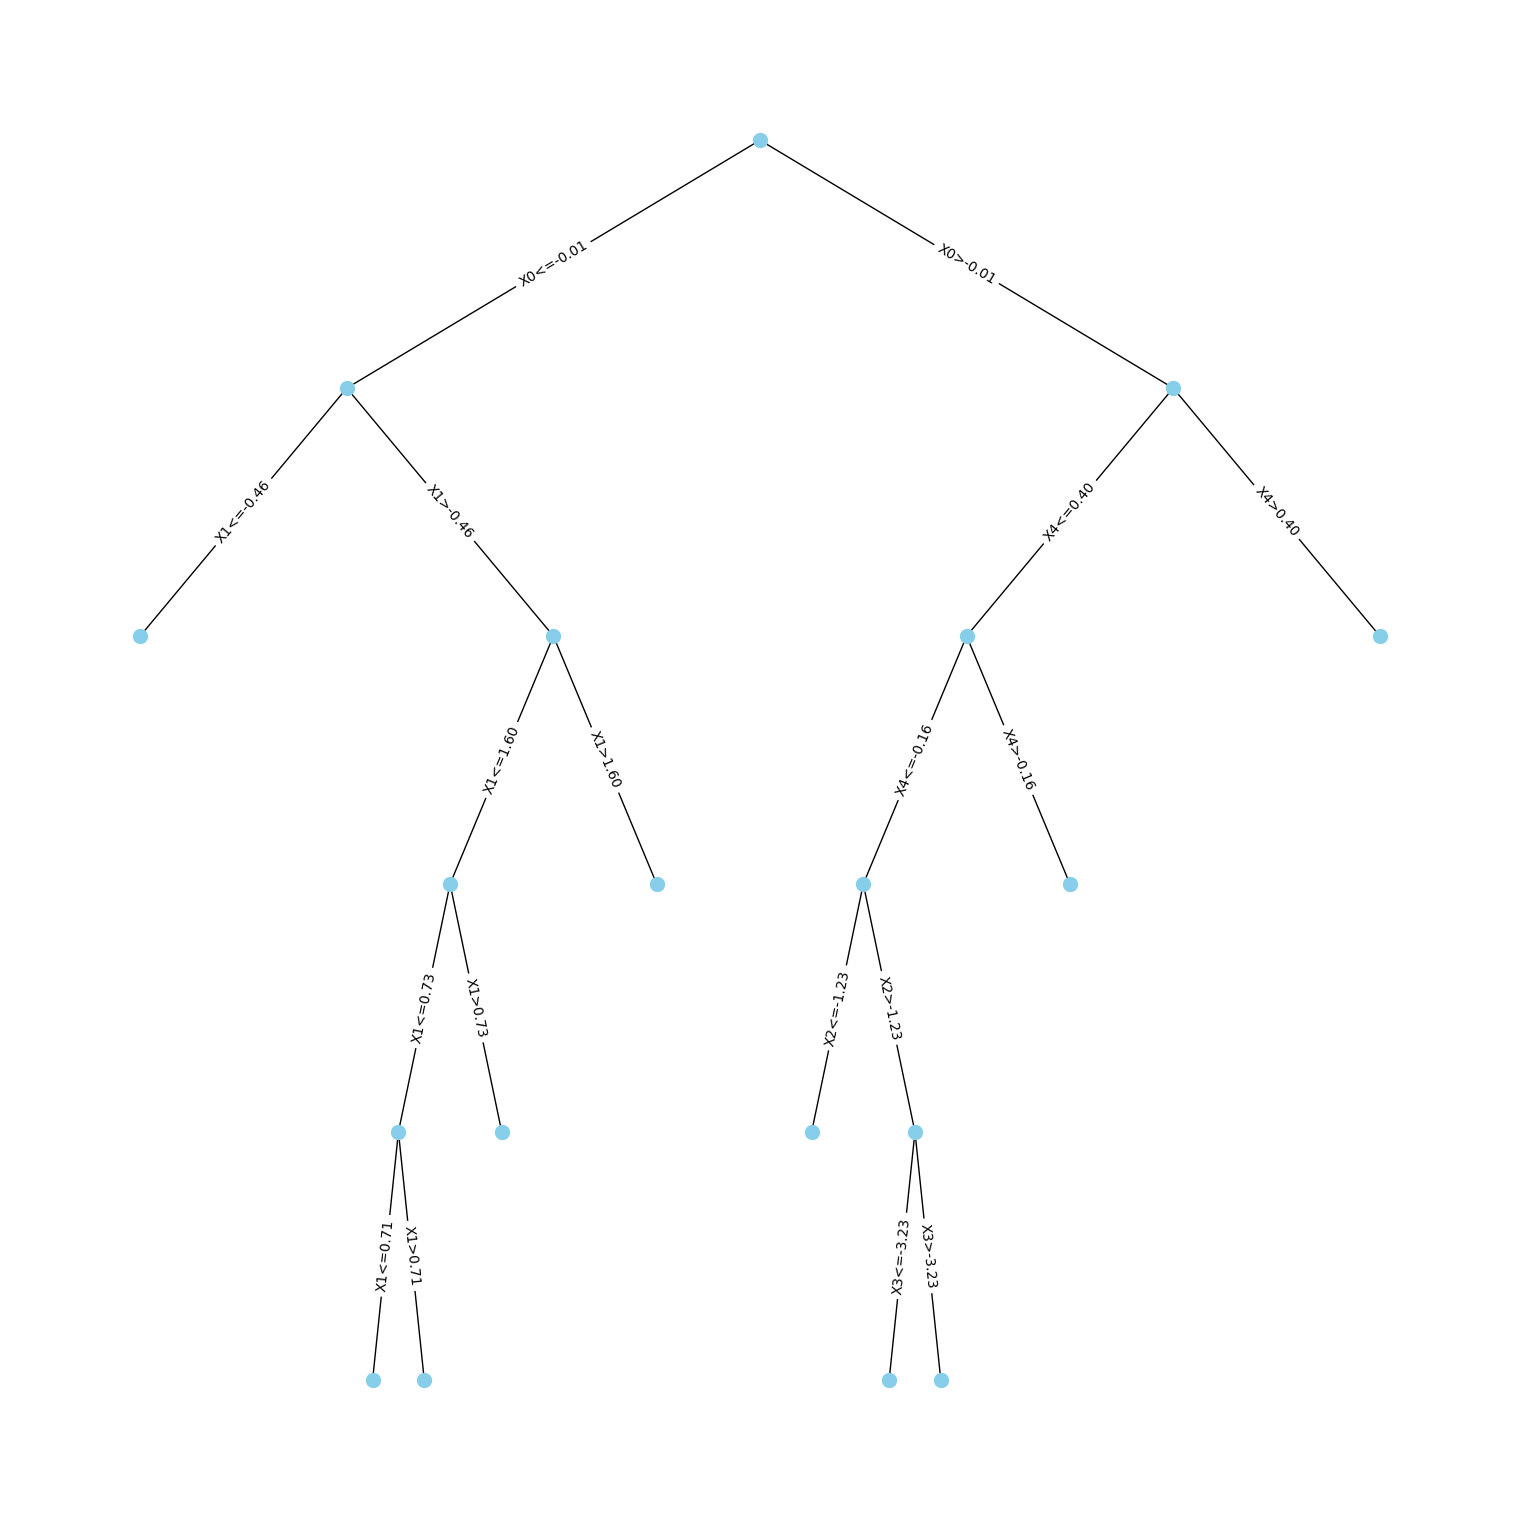

In [356]:
draw_tree(reg_tree.root)

In [357]:
pval, dist, contrast, norm_contrast, obs_tar, logW, suff, sel_probs = (
    reg_tree.condl_split_inference(node=reg_tree.root, 
                                   ngrid=10000,
                                   ncoarse=200,
                                   grid_width=15,
                                   reduced_dim=5,
                                   sd=sd))

LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.575291543256194
LB: -13.57529154

/Users/yilingh/Desktop/PhD/SI_Codes/SI-CART/Utils/discrete_family.py:148: RuntimeWarning: overflow encountered in scalar multiply
  self._partition *= np.exp(_largest)


In [358]:
print(obs_tar)

6.722201766156192


In [359]:
print(norm_contrast.dot(mu))

7.2012819371596315


In [360]:
print(norm_contrast.dot(mu))

7.2012819371596315


In [361]:
mu

array([0, 3, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 3, 0, 2, 2, 3, 3, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 3, 0, 1, 2,
       3, 0, 3, 2, 0, 3])

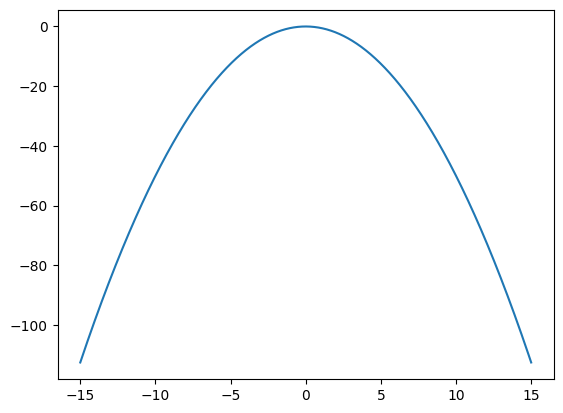

In [362]:
import matplotlib.pyplot as plt
x = np.linspace(-15, 15, 10000)
plt.plot(x, suff)

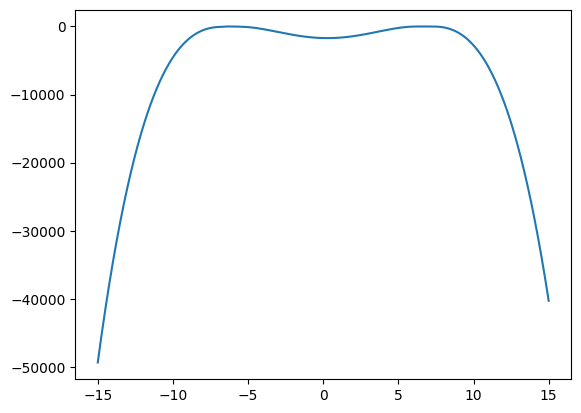

In [363]:
#plt.plot(x[380:620], sel_probs[380:620])
#plt.plot(x[4000:7000], sel_probs[4000:7000])
plt.plot(x, sel_probs)

Theta setter called
Theta setter called
Theta setter called


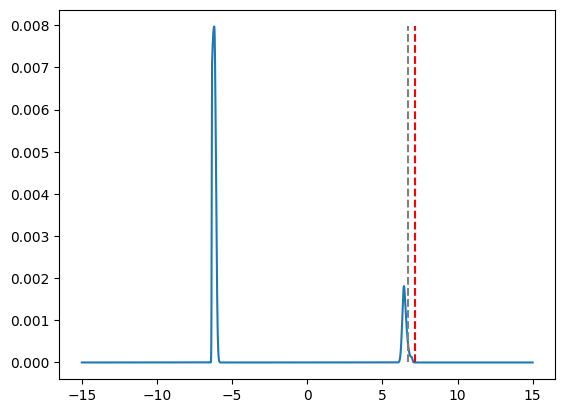

In [364]:
plt.plot(x, dist.pdf(theta=0))
plt.vlines(obs_tar, ymin=0, ymax=np.max(dist.pdf(theta=0)),
           linestyles='--', colors='grey')
plt.vlines(norm_contrast.dot(mu), ymin=0, 
           ymax=np.max(dist.pdf(theta=0)),
           linestyles='--', colors='red')

In [346]:
(dist.pdf(theta=norm_contrast.dot(mu))[x > obs_tar]).sum()

Theta setter called


np.float64(0.097186902986713)

In [347]:
(x > obs_tar).sum()

np.int64(2422)

In [348]:
(pivot_f, condl_density_f, contrast_f, norm_contrast_f,
 observed_target_f, logWeights_f, sel_probs_f) \
    = reg_tree.split_inference(node=reg_tree.root, 
                               ngrid=10000,
                               ncoarse=200,
                               grid_width=15,
                               sd=sd)

barr 225.78098182531645
obj -8302.642938203298
conjugate norm: 680.2303158741798
barr 228.49743606087256
obj -7797.626800317636
conjugate norm: 666.957907257918
barr 227.90700455486987
obj -7713.629487748142
conjugate norm: 653.8170042109745
barr 226.67935788864614
obj -7693.601605545507
conjugate norm: 640.8076065022982
barr 226.7257879738005
obj -7285.586873193745
conjugate norm: 627.9297139394549
barr 222.2034221073385
obj -8182.62153759501
conjugate norm: 615.1833263731202
barr 212.57721037082297
obj -9099.850042459364
conjugate norm: 602.5684437020127
barr 214.2140897608197
obj -9012.817917322624
conjugate norm: 590.0850658783077
barr 213.5286786243075
obj -8726.082783075151
conjugate norm: 577.733192913584
barr 211.22510853096492
obj -8384.936210060725
conjugate norm: 565.5128248853528
barr 213.69757853641764
obj -8051.486379145877
conjugate norm: 553.4239619442291
barr 212.09166014771006
obj -7826.834708230589
conjugate norm: 541.4666043218184
barr 210.80024920924598
obj -7547.4

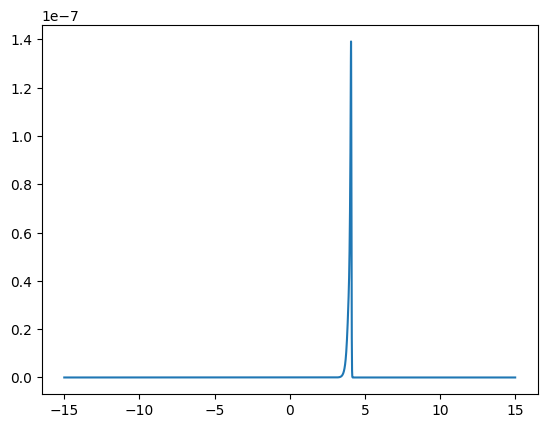

In [333]:
plt.plot(x, np.exp(sel_probs_f))

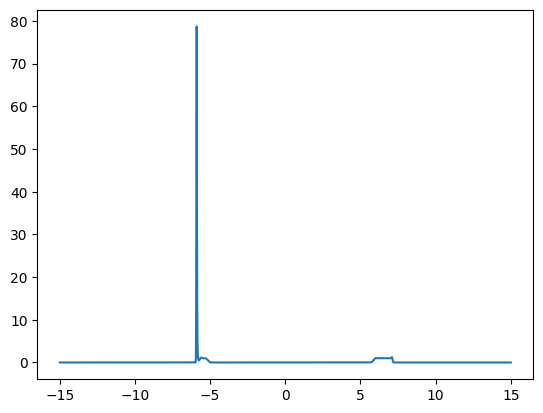

In [334]:
plt.plot(x, np.exp(sel_probs))

Theta setter called
Theta setter called
Theta setter called


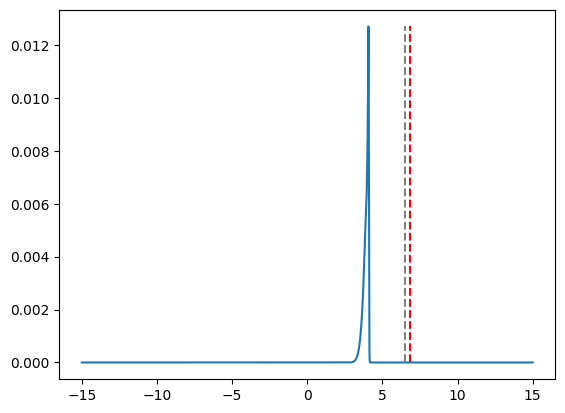

In [335]:
plt.plot(x, condl_density_f.pdf(theta=0))
plt.vlines(obs_tar, ymin=0, ymax=np.max(condl_density_f.pdf(theta=0)),
           linestyles='--', colors='grey')
plt.vlines(norm_contrast.dot(mu), ymin=0, 
           ymax=np.max(condl_density_f.pdf(theta=0)),
           linestyles='--', colors='red')

# Replicate Tree Value Simulations

In [117]:
X = np.random.normal(size=(100, 10))
a = 1
b = 1
mu = b* ( (X[:,0] <= 0) * (1 + a * (X[:,1] > 0) + (X[:,2] * X[:,1] <= 0)) )
y = mu + np.random.normal(size=(100,), scale=1)

In [31]:
# Create and train the regression tree
reg_tree = RegressionTree(min_samples_split=10, max_depth=10)
reg_tree.fit(X, y)

# Make predictions
predictions = reg_tree.predict(X)
#print(predictions)
reg_tree.print_branches()

 j: 0
 threshold: -0.026246156794562686
 left:
	 j: 8
	 threshold: -0.47691162512272384
	 left:
		 j: 6
		 threshold: -1.882026910030391
		 left:
		 right:
			 j: 5
			 threshold: -0.7006531475942253
			 left:
			 right:
	 right:
		 j: 1
		 threshold: -0.046286560689003074
		 left:
			 j: 4
			 threshold: -0.6951223438765441
			 left:
			 right:
				 j: 1
				 threshold: -1.7342866936815915
				 left:
				 right:
					 j: 9
					 threshold: -0.2666871517794296
					 left:
					 right:
		 right:
			 j: 1
			 threshold: 1.3119538813916485
			 left:
				 j: 5
				 threshold: 0.020045901693990745
				 left:
				 right:
			 right:
 right:
	 j: 6
	 threshold: 1.1256570637586534
	 left:
		 j: 4
		 threshold: 1.461856376611065
		 left:
			 j: 6
			 threshold: -1.7952845350243212
			 left:
			 right:
				 j: 4
				 threshold: -0.4259380811250433
				 left:
					 j: 1
					 threshold: 1.6819463364634613
					 left:
						 j: 8
						 threshold: -0.3066579992144446
						 left:
						 right:
				

# A Toy Example Showing the Symmetry in Selection Probabilities

Suppose $n=4$ and we want to divide a dataset based on one covariate $X$ where $X_1, X_2 \leq X_3, X_4$.

In [291]:
eta = np.array([-0.5, -0.5, 0.5,0.5])

In [298]:
P_perp = np.eye(4) - np.linalg.outer(eta, eta)/(np.linalg.norm(eta)**2)

In [299]:
Y = np.array([-5.5, -4.5, 1.5, 0.5])
mu = np.array([-5, -5, 1, 1])

In [300]:
P_perp @ Y

array([-2.5, -1.5, -1.5, -2.5])

In [301]:
reconstructed_Y = np.linalg.outer(eta, eta)/(np.linalg.norm(eta)**2) @ (-Y) + P_perp @ Y

In [302]:
reconstructed_Y

array([ 0.5,  1.5, -4.5, -5.5])

In [303]:
Y

array([-5.5, -4.5,  1.5,  0.5])

This means, in some cases, flipping sign of the inner product $\eta'Y$ will result in a $Y$ with the original left and right node being flipped, but if we calculate the gain, the gain will stay the same as the version using $\eta'Y$.